In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-04 08:39:03--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.249
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 3974305 (3,8M) [text/plain]
Сохранение в: «adult.data.1»

adult.data.1        100%[===================>]   3,79M  1,36MB/s    за 2,8s    

2019-04-04 08:39:07 (1,36 MB/s) - «adult.data.1» сохранён [3974305/3974305]



In [2]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [2]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [3]:
df = pd.read_csv('adult.data', names=cols)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [5]:
print('Количество мужчин: ', df.sex.value_counts()[' Male'])
print('Количество женщин: ', df.sex.value_counts()[' Female'])

Количество мужчин:  21790
Количество женщин:  10771


# Средний возраст мужчин и женщин?

In [6]:
print('Средний возраст мужчин: {} лет'.format(round(df.groupby('sex')['age'].mean()[' Male'], 3)))
print('Средний возраст мужчин: {} лет'.format(round(df.groupby('sex')['age'].mean()[' Female'], 3)))

Средний возраст мужчин: 39.434 лет
Средний возраст мужчин: 36.858 лет


# Какая доля граждан США (United-States) в данном датасете?

In [7]:
print(round(df['native-country'].value_counts(True)[' United-States'], 3), '- доля граждан США')

0.896 - доля граждан США


# Нарисуйте распределение образования людей (используйте bar plot)

Подпишите график и оси.

Text(0, 0.5, 'Относительная доля людей')

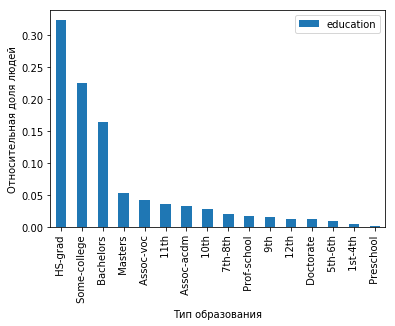

In [8]:
help_df = pd.DataFrame(df.education.value_counts(True))
ax = help_df.plot.bar()
ax.set_xlabel('Тип образования')
ax.set_ylabel('Относительная доля людей')

# Какое среднее значение и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

Mean: 185802.79
Standart deviation: 105646.789


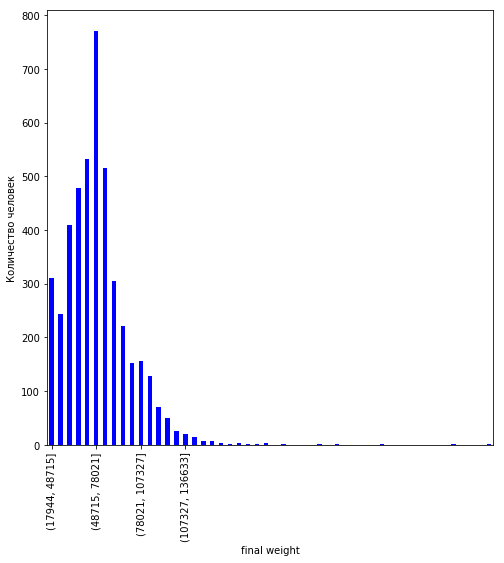

In [9]:
print('Mean: {}'.format(round(df.groupby('marital-status')['fnlwgt'].mean()[' Divorced'], 3)))
print('Standart deviation: {}'.format(round(df.groupby('marital-status')['fnlwgt'].std()[' Divorced'], 3)))
num_of_bins = 50
help_df = df.groupby('marital-status')['fnlwgt'].value_counts(bins = num_of_bins, sort = False)[' Divorced']
help_df.index = help_df.index.astype('interval[int64]')  # изменяем тип для дальнейшей красоты
ax = help_df.plot.bar(figsize = (8, 8), color = 'blue')
ax.set_xlabel('final weight')
ax.set_ylabel('Количество человек')
# set_xticks задает расположение меток по ох, однако относительно чего местоположения рассчитываются - не понял
ax.set_xticks([0, 5, 10, 15])

> Ответ: распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [13]:
help_df = df.groupby('result')['education'].value_counts(True)[' >50K']
print('Относительная доля людей с тем или иным образованием, получающих >50K \n {}'.format(help_df))
print('Людей с образованием Bachelors or Masters or Doctorate {}'.
     format(round(help_df[' Bachelors']+help_df[' Masters']+help_df[' Doctorate'], 3)))

Относительная доля людей с тем или иным образованием, получающих >50K 
 education
 Bachelors       0.283255
 HS-grad         0.213621
 Some-college    0.176891
 Masters         0.122306
 Prof-school     0.053947
 Assoc-voc       0.046040
 Doctorate       0.039026
 Assoc-acdm      0.033797
 10th            0.007907
 11th            0.007652
 7th-8th         0.005101
 12th            0.004209
 9th             0.003443
 5th-6th         0.002041
 1st-4th         0.000765
Name: education, dtype: float64
Людей с образованием Bachelors or Masters or Doctorate 0.445


> Ответ: Нет

# Сколько в среднем работают люди в неделю в зависимости от education?

In [14]:
df.groupby('education')['hours-per-week'].mean()

education
 10th            37.052519
 11th            33.925957
 12th            35.780600
 1st-4th         38.255952
 5th-6th         38.897898
 7th-8th         39.366873
 9th             38.044747
 Assoc-acdm      40.504217
 Assoc-voc       41.610709
 Bachelors       42.614006
 Doctorate       46.973366
 HS-grad         40.575374
 Masters         43.836332
 Preschool       36.647059
 Prof-school     47.425347
 Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [15]:
print('В среднем мужчины работают {} часов в неделю'.format(round(df.groupby('sex')['hours-per-week'].mean()[' Male'], 2)))
print('В среднем женщины работают {} часов в неделю'.format(round(df.groupby('sex')['hours-per-week'].mean()[' Female'], 3)))

В среднем мужчины работают 42.43 часов в неделю
В среднем женщины работают 36.41 часов в неделю


> Ответ: Мужчины работают больше.

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [16]:
print('Среднее кол-во рабочих часов в зависимости от статуса отношений \n {}'.
     format(round(df.groupby('relationship')['hours-per-week'].mean(), 2)))

mean_n, mean_y = 0, 0
num_n, num_y = 0, 0
for i in df.groupby('relationship')['hours-per-week'].mean().index:
    if i == ' Not-in-family' or i ==  'Unmarried':
        mean_n += df.groupby('relationship')['hours-per-week'].mean()[i]
        num_n += 1
    else:
        mean_y += df.groupby('relationship')['hours-per-week'].mean()[i]
        num_y += 1
mean_n /= num_n
mean_y /= num_y

print('Люди, не состоящие в отношениях, в среднем работают {} часов в неделю'.format(round(mean_n, 3)))
print('Люди, состоящие в отношениях, в среднем работают {} часов в неделю'.format(round(mean_y, 3)))

Среднее кол-во рабочих часов в зависимости от статуса отношений 
 relationship
 Husband           44.12
 Not-in-family     40.60
 Other-relative    37.01
 Own-child         33.27
 Unmarried         39.10
 Wife              36.86
Name: hours-per-week, dtype: float64
Люди, не состоящие в отношениях, в среднем работают 40.596 часов в неделю
Люди, состоящие в отношениях, в среднем работают 38.072 часов в неделю


> Ответ: Люди без отношений в среднем работают больше

# Из каких стран люди работают farmers/fishers?

In [17]:
print('Количество людей, работающих в Farming-fishing, из различных стран \n {}'.
     format(df.groupby('occupation')['native-country'].value_counts()[' Farming-fishing']))


Количество людей, работающих в Farming-fishing, из различных стран 
 native-country
 United-States    879
 Mexico            77
 ?                  5
 Puerto-Rico        5
 Guatemala          4
 Philippines        4
 Canada             2
 Cuba               2
 El-Salvador        2
 Italy              2
 Vietnam            2
 Cambodia           1
 England            1
 France             1
 Germany            1
 Hong               1
 Ireland            1
 Japan              1
 Poland             1
 Portugal           1
 Yugoslavia         1
Name: native-country, dtype: int64


# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [30]:
maximum = df['hours-per-week'].max()
print('Максимальное количество рабочих часов в неделю ', maximum)
print('Количество человек, работающих столько, ', df['hours-per-week'].value_counts()[maximum])
print('Из них {} с доходом <=50К'.format(df.groupby('hours-per-week')['result'].value_counts()[maximum][' <=50K']))
print('И {} с доходом >50К'.format(df.groupby('hours-per-week')['result'].value_counts()[maximum][' >50K']))

Максимальное количество рабочих часов в неделю  99
Количество человек, работающих столько,  85
Из них 60 с доходом <=50К
И 25 с доходом >50К
